<a href="https://colab.research.google.com/github/Sitimildaalkan/milda_PCD/blob/main/Denoising_An_Image_Using_Mean_and_Median_Filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import cv2
import numpy as np
from skimage import img_as_ubyte
from matplotlib import pyplot as plt

## original image
img = cv2.imread('lenna.png', 0)
img = img/img.max() # normalize the pixel value (0~1)

f = cv2.imread('lenna.png',0)


In [56]:
# Salt and Pepper Noise
x,y = img.shape
g = np.zeros((x,y), dtype=np.float32)
pepper = 0.1
salt = 0.95
for i in range(x):
    for j in range(y):
        rdn = np.random.random()
        if rdn < pepper:
            g[i][j] = 0
        elif rdn > salt:
            g[i][j] = 1
        else:
            g[i][j] = img[i][j]

img_noise = g # Assign g to img_noise for display

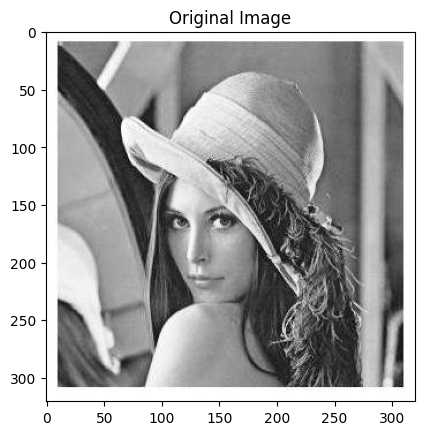

In [57]:
plt.title('Original Image')
plt.imshow(img, cmap='gray')
plt.show()

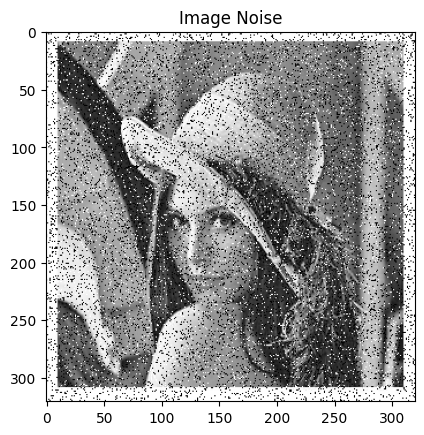

In [58]:
# preview the images
plt.title('Image Noise')
plt.imshow(img_noise,cmap = 'gray')
plt.show()

cv2.waitKey(0)
cv2.destroyAllWindows()

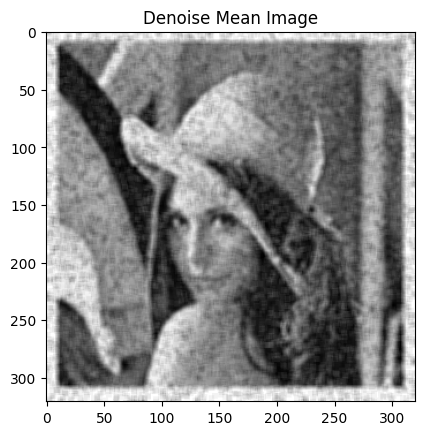

In [59]:
## denoise image
# mean filter (average)
m = 5
n = 5
denoise_mean = cv2.blur(img_noise, (m,n))

plt.title('Denoise Mean Image')
plt.imshow(denoise_mean, cmap='gray')
plt.show()

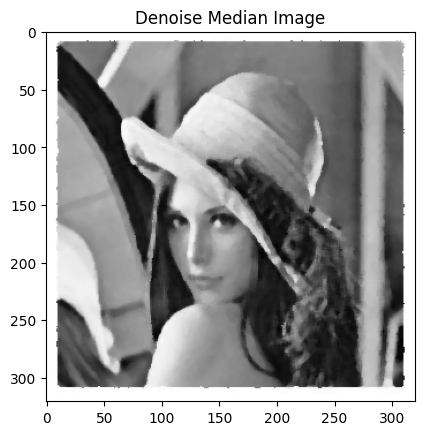

In [60]:
# median filter
img_noise_median = np.clip(img_noise, -1, 1) #pixel value range
img_noise_median = img_as_ubyte(img_noise_median) #convert to uint8
denoise_median = cv2.medianBlur(img_noise_median, 5)

plt.title('Denoise Median Image')
plt.imshow(denoise_median, cmap='gray')
plt.show()


In [61]:
# (optional) save the result
cv2.imwrite('Denoise mean.jpg', img_as_ubyte(denoise_mean))
cv2.imwrite('Denoise median.jpg', img_as_ubyte(denoise_median))

True